In [46]:
import numpy as np
from importlib import reload
import sys
import os
import pandas as pd

BASE_DIR = os.path.abspath("..")
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

import matplotlib.pyplot as plt

import Eigen.PageRank
reload(Eigen.PageRank)
from Eigen.PageRank import page_rank


import utils.read_data 
reload(utils.read_data)
from utils.read_data import read_pages

import utils.draw_graph
reload(utils.draw_graph)
from utils.draw_graph import draw_graph



# First step

Into the cell below are called two functions:

1) the first function read the data from the dataset
2) the second function plots a random subweb to have a look to the dataset

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 829 stored elements and shape (6012, 1)>
  Coords	Values
  (0, 0)	0.041666666666666664
  (7, 0)	0.041666666666666664
  (15, 0)	0.0625
  (17, 0)	0.07692307692307693
  (19, 0)	0.06666666666666667
  (22, 0)	0.043478260869565216
  (25, 0)	0.08333333333333333
  (26, 0)	0.08333333333333333
  (27, 0)	0.041666666666666664
  (28, 0)	0.043478260869565216
  (29, 0)	0.0625
  (30, 0)	0.03125
  (31, 0)	0.05
  (32, 0)	0.058823529411764705
  (33, 0)	0.041666666666666664
  (34, 0)	0.14285714285714285
  (35, 0)	0.0625
  (36, 0)	0.07142857142857142
  (37, 0)	0.03225806451612903
  (38, 0)	0.04
  (40, 0)	0.0625
  (41, 0)	0.058823529411764705
  (42, 0)	0.06666666666666667
  (43, 0)	0.023255813953488372
  (44, 0)	0.047619047619047616
  :	:
  (3150, 0)	0.06666666666666667
  (3155, 0)	0.06666666666666667
  (3156, 0)	0.25
  (3157, 0)	0.3333333333333333
  (3158, 0)	0.14285714285714285
  (3159, 0)	0.2
  (3160, 0)	0.16666666666666666
  (3161, 0)	0.2
  (

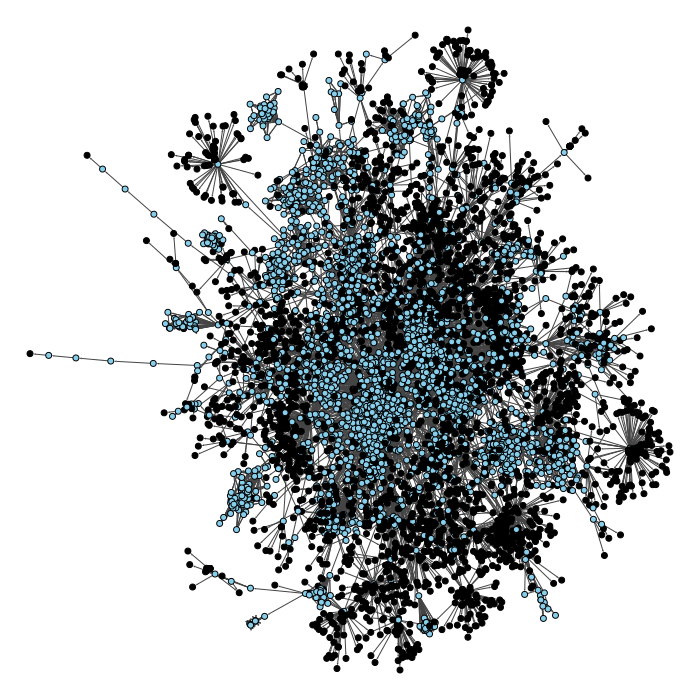

In [47]:
file_path = "DataSet/hollins.dat"
seed = 900
fig_size=(7,7)
lay = "fr"   # try "fr", "kk", "circle", "grid", "tree", lgl, auto, random, drl    best = fr


A,node_map,edges, sink_nodes, no_backlink_nodes, out_deg, in_deg , backlinks= read_pages(file_path)
print(A[:,1])
n = A.shape[0]

sample_size = n
sampled_nodes_list = list(range(n))
  

sampled_nodes, layout_cords  = draw_graph(A,sample_size=sample_size, sampled_nodes=sampled_nodes_list, seed = 9, fig_size=fig_size, lay = lay)

# Power method

In the cell below is applied the Power Method for computing the score 

The Power Method compute the eigenvector with the highest magnitude. In this case the convergence is not guaranteed because of the dangling nodes that make matrix $\mathbf{M}$ not column-stochastic. For solving this problem is implemented a new matrix $\bar{\mathbf{S}}$ as:
$$
\bar{S_{:,j}} = 
\begin{cases}
\tfrac{m}{n}   & \text{if j is not a dangling node}\\
\tfrac{1}{n}  & \text{if j is a dangling node}
\end{cases}
$$

The algorithm is the following:

**Input:**
- Square Matrix $\mathbf{A} \in \mathbb{R}^{n \times n} $
- the factor $m\in[0,1]$
- initial guess vector $ \mathbf{x}^{(0)} \in \mathbb{R}^n $
- maxIter $ k_{\max} $
- Tol $ \varepsilon $

**Output:**
- Approximation of the dominant eigenvalue $ \lambda $
- Approximation of the dominant eigenvector $ \mathbf{x}^{(k+1)} $
- Iteration needed $k +1$

---

**Algorithm:**

1. Normalize the vector:
   $
   x^{(0)} \leftarrow \frac{\mathbf{x}^{(0)}}{\|\mathbf{x}^{(0)}\|_1}
   $

2. For $ k= 0,1,2,\dots,k_{\max} $
   
   1. Compute:
      $
      \mathbf{y}^{(k+1)} = (1-m)\mathbf{A x}^{(k)}+\bar{\mathbf{S}}\mathbf{x}^{(k)}
      $
   
   2. Normalize:
      $
      \mathbf{x}^{(k+1)} = \frac{\mathbf{y}^{(k+1)}}{\|\mathbf{y}^{(k+1)}\|_1}
      $
   

   3. if:
      $
      \| \mathbf{x}^{(k+1)} - \mathbf{x}^{(k)} \|_1 < \varepsilon
      $
      break.
    
3. Eigenvalue extimation :
      $
      \lambda = (x^{(k+1)})^\top y^{(k+1)}
      $

3. Return $ x^{(k+1)} ,  \lambda, k+1 $


---

Is possible to observe that the computation of $\bar{\mathbf{S}}\mathbf{x}^{(k)}$ is not costly, just observing that :
$$
\bar{\mathbf{S}}\mathbf{x}^{(k)} = \langle S_{:,j},x^{(k)}\rangle\mathbb{1}_{n}       \quad \quad \text{for an arbitrary j}
$$
with computational cost $O(n)$



The method stopped before k= 10000
number of iteration needed k= 100


value of c compared to |1-2*m/n|
0.9999500998003992
0.9999500998003992
the approximation of the eigenvalue with the highest magnitude
0.9589622351010706


/tmp/ipykernel_30651/741690209.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


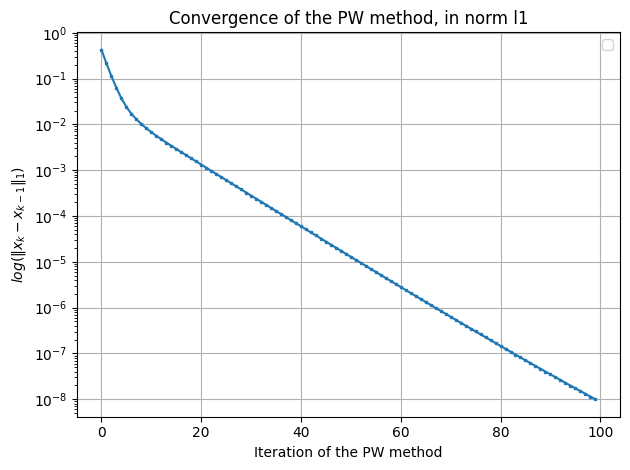

In [48]:
x_0 = np.ones((A.shape[0],1))
m = 0.15
#name = "error_with_m_099.png"
score,lam,c,p,diff = page_rank(A,m,x_0,sink_nodes,no_backlink_nodes,k=10000)

print("number of iteration needed k=",p)
print("\n")
print("value of c compared to |1-2*m/n|")
print(c)
print(abs(1-2*m/n))  # I claim that max_i|1-2min_j M_ij| = |1-2*m/n|
print("the approximation of the eigenvalue with the highest magnitude")
print(lam)

plt.plot(range(0, p), diff, marker='s', markersize=2)
plt.xlabel("Iteration of the PW method")
plt.ylabel(r"$ log(\|x_k - x_{k-1}\|_1)$")
plt.title("Convergence of the PW method, in norm l1")
plt.legend()
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
#plt.savefig(name, format="png", dpi=300, bbox_inches="tight", pad_inches=0.3)
plt.show()

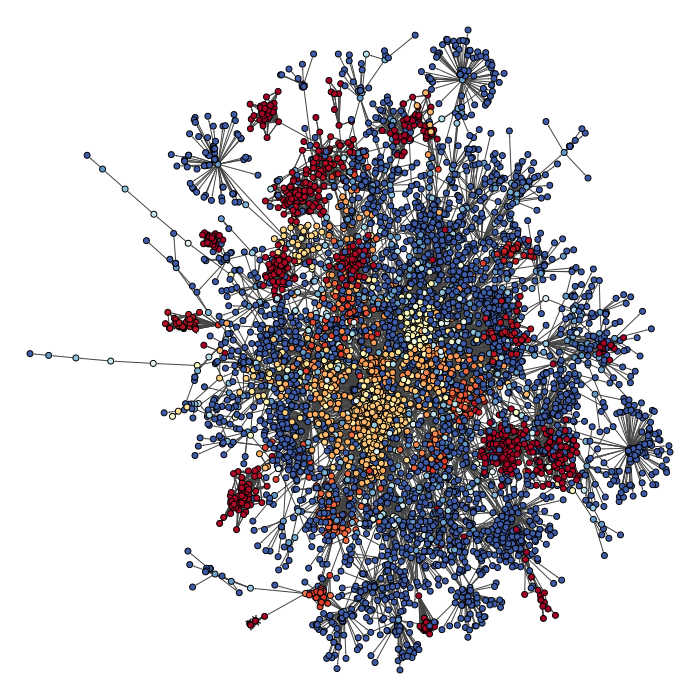

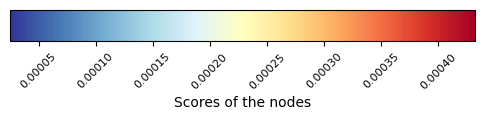

In [49]:
color_map = 'RdYlBu_r'   #'viridis' , 'RdYlBu_r' , 'inferno' , 'magma', 'cividis', 'Greys', 'Blues', 'Greens', 'Oranges', 'Purples'
_,_ = draw_graph(A,sampled_nodes=sampled_nodes, sample_size=sample_size, seed = seed, values = score, cmap=color_map, fig_size=fig_size, lay = lay, layout_coords=layout_cords)

In [50]:

#Table

data = []
for node_id, url in node_map.items():

    sc = score[node_id ][0]  # 
    incoming = in_deg.get(node_id, 0)
    outcoming = out_deg.get(node_id, 0)

    # average score of the backlinks, 
    incoming_nodes = backlinks[int(node_id)]

    if incoming_nodes:
        avg_backlink_score = sum(score[src][0] for src in incoming_nodes) / len(incoming_nodes)
    else:
        avg_backlink_score = 0.0

    is_sink = (node_id in sink_nodes)

    data.append((url, sc, incoming, outcoming, avg_backlink_score, is_sink))

df = pd.DataFrame(data, columns=['page', 'score', 'Num backlinks', 'Num forwardlinks', 'Avg score of the backlink pages', 'Sink Page'])

# sorting
df = df.sort_values(by='score', ascending=False).reset_index(drop=True)

styled_df = (
    df.style
    .format({"score": "{:.5e}", "Avg score of the backlink pages": "{:.5e}"})
    .background_gradient(subset=['score','Avg score of the backlink pages'], cmap=color_map) 
    .set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]  
    ) 
    #.bar(subset=['backlinks', 'forwardlinks'], color='lightblue')
    .set_properties(**{'text-align': 'center'})
    .hide(axis='index')
)

display(styled_df)